# Лабораторная работа 1. Язык Python, основные библиотеки для анализа данных.

ФИО: Коваленко Павел Антонович

Группа: 317

In [97]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as pp

## Часть 1: Python

#### 1. Напишите код, который сформирует список всех натуральных чисел, не превосходящих 100, которые делятся на 7 и не делятся на 5. Нельзя использовать циклы — выполните это задание с помощью list comprehension.

In [34]:
x = [i for i in range(1, 101) if i % 7 == 0 and i % 5 != 0]
print(x)

[7, 14, 21, 28, 42, 49, 56, 63, 77, 84, 91, 98]


#### 2. Напишите функцию `sort_tokens(s)`, которая принимает на вход строку, разделяет ее на токены по запятым, сортирует токены с помощью функции `sorted()` и снова соединяет их в одну строку через запятые. Например, для строки `u"ночь,фонарь,улица"` функция должна выдать `u"ночь,улица,фонарь"`. Придумайте несколько входных строк и протестируйте функцию на них.

Обратите внимание, что склеить строки можно с помощью конструкции `'x'.join(...)`. Например:

In [2]:
'! '.join(['i', 'am', 'very', 'excited', ':-)'])

'i! am! very! excited! :-)'

In [15]:
def sort_tokens(s):
    return ','.join(sorted(s.split(',')))
print(sort_tokens(u'ночь,фонарь,улица'))
print(sort_tokens('a,b,c,d,e'))
print(sort_tokens(''))
print(sort_tokens('-_-,,;-),0_0,  =/  ,,'))

ночь,улица,фонарь
a,b,c,d,e

,,,  =/  ,-_-,0_0,;-)


#### 3. Напишите функцию `remove_duplicates(a)`, которая принимает на вход список и возвращает его же, но без дубликатов и в отсортированном виде. Например, для списка `[u"ночь", u"улица", u"фонарь", u"аптека", u"аптека", u"улица", u"фонарь"]` результат должен быть `[u"аптека", u"ночь", u"улица", u"фонарь", ]`.

Подсказка: обратите внимание на структуру `set`!

In [27]:
def remove_duplicates(a):
    return sorted(list(set(a)))
print(remove_duplicates([u'ночь', u'улица', u'фонарь', u'аптека', u'аптека', u'улица', u'фонарь']))
print(remove_duplicates([]))
print(remove_duplicates(['', '', '_', 'word', 'a couple of words', 'one', 'more', 'word', '']))
print(remove_duplicates([100, 7, 10, 10 ** 2, 1e2, 0x0A, 1e2, 2e2, 0b1010]))

['аптека', 'ночь', 'улица', 'фонарь']
[]
['', '_', 'a couple of words', 'more', 'one', 'word']
[7, 10, 100, 200.0]


#### 4. Напишите функцию `word_counts(texts)`, которая принимает на вход список строк, и печатает пары (слово, число вхождений). Считайте, что слова в текстах могут быть разделены только пробелами. Например, для входа `[u'ночь улица фонарь аптека', u'аптека улица фонарь']` должно быть напечатано
>аптека 2

>улица 2

>фонарь 2

>ночь 1

Подсказки:

Чтобы разбить каждый из текстов на слова, воспользуйтесь функцией `map`, которая применяет заданную функцию к каждому элементу списка. Например, если бы нужно было каждый из текстов привести к нижнему регистру, то команда выглядела бы так:

In [3]:
map(lambda x: x.lower(), ["abCDefg", "HIjkL"])

['abcdefg', 'hijkl']

После первого шага вы получите список, состоящий из списков слов. Чтобы объединить их в один список слов, воспользуйтесь функцией `reduce`. Например, просуммировать числа из списка с ее помощью можно так:



In [4]:
reduce(lambda x, y: x + y, [1, 2, 3, 4, 5])

15

Для подсчета количества вхождений слов воспользуйтесь структурой `defaultdict` из модуля `collections`. В отличие от обычного `dict`, она не генерирует ошибку при обращении к несуществущему ключу, а создает новую запись, инициализируемую нулевым значением. Например:

In [5]:
from collections import defaultdict
d = defaultdict(int)
print d
d['abc'] += 1
print d
d['xxx']
print d

defaultdict(<type 'int'>, {})
defaultdict(<type 'int'>, {'abc': 1})
defaultdict(<type 'int'>, {'xxx': 0, 'abc': 1})


In [42]:
from collections import defaultdict
from functools import reduce
def word_count(texts):
    text = reduce(lambda a, b: a + b, map(lambda a: a.split(' '), texts))
    cnt = defaultdict(int)
    for s in text:
        cnt[s] += 1
    for s, c in cnt.items():
        print(s, c)
t = [u'ночь улица фонарь аптека', u'аптека улица фонарь']
print(t)
word_count(t)
t = ['           ', '  ']
print(t)
word_count(t)
t = ['1    3 4 5 67', '777', '', '3 2 1             ']
print(t)
word_count(t)

['ночь улица фонарь аптека', 'аптека улица фонарь']
ночь 1
аптека 2
улица 2
фонарь 2
['           ', '  ']
 15
['1    3 4 5 67', '777', '', '3 2 1             ']
 17
3 2
1 2
4 1
2 1
67 1
777 1
5 1


#### 5. (бонусное задание) Скачайте английский перевод "Преступления и наказания". Найдите 20 самых популярных слов и 20 слов, которые встречаются только один раз.

Приведите текст к нижнему регистру. Разделите текст на слова, считая разделителями все, кроме букв. Обратите внимание на функцию `split` из модуля `re`.

Не забудьте удалить пустые слова:
```
words = filter(lambda x: len(x) > 0, words)
```

In [46]:
from urllib.request import urlopen
url = "http://www.gutenberg.org/files/2554/2554.txt"
response = urlopen(url)
raw_text = response.read().decode('utf8')

In [47]:
raw_text[1000:1100]

'r five\r\nchildren in only two rooms. The father and mother spent their evenings\r\nin reading aloud to '

In [56]:
import re
from collections import defaultdict
words = map(lambda x: x.lower(), re.split(r'[^a-zA-Z]+', raw_text))
words = filter(lambda x: len(x) > 0, words)
cnt = defaultdict(int)
for s in words:
    cnt[s] += 1
words_freq = list(cnt.items())
print('20 most popular')
print(sorted(words_freq, key = lambda x: x[1], reverse = True)[:20])
print('20 seen only once')
print(list(filter(lambda x: x[1] == 1, words_freq))[:20])

20 most popular
[('the', 8003), ('and', 7042), ('to', 5497), ('he', 4900), ('a', 4668), ('i', 4405), ('you', 4118), ('of', 3928), ('it', 3463), ('that', 3308), ('in', 3254), ('was', 2827), ('his', 2116), ('at', 2082), ('her', 1829), ('but', 1801), ('not', 1775), ('s', 1765), ('with', 1757), ('she', 1695)]
20 seen only once
[('originality', 1), ('approval', 1), ('lounging', 1), ('creed', 1), ('keepsake', 1), ('demoralisation', 1), ('papering', 1), ('lads', 1), ('hovering', 1), ('damsels', 1), ('overgrown', 1), ('dealings', 1), ('elapse', 1), ('presupposes', 1), ('evils', 1), ('stepdaughter', 1), ('reporting', 1), ('associations', 1), ('oddities', 1), ('inflated', 1)]


## Часть 2: NumPy и SciPy

#### 1. Повторите 1000 раз следующий эксперимент: сгенерируйте две матрицы размера $10 \times 10$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

Для вычисления квантили воспользуйтесь функцией `np.percentile`

Mean 8.47834550928
95% percentile 11.8328255072


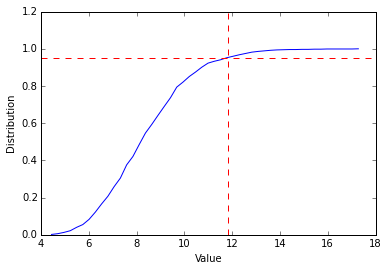

In [113]:
a = np.empty(0, dtype='float64')
n = 1000
for i in range(n):
    x = np.random.randn(10, 10)
    y = np.random.randn(10, 10)
    a = np.append(a, [x.dot(y).max()])
print('Mean', a.mean())
pc = np.percentile(a, 95)
print('95% percentile', pc)
v, b = np.histogram(a, bins=50)
dist = np.cumsum(v / n)
%matplotlib inline
pp.plot((b[:-1] + b[1:]) / 2, dist)
pp.axhline(y=0.95, color='red', linestyle='--')
pp.axvline(x=pc, color='red', linestyle='--')
pp.xlabel('Value')
pp.ylabel('Distribution')
pp.show()

#### 2. Сгенерируйте 1000 чисел из распределения Пуассона с параметром $\lambda = 5$. Сформируйте массив, в котором в i-м элементе будет записано количество сгенерированных чисел, равных i.

Обратите внимание на функцию `np.bincount`

[  8  31  82 133 180 173 146 122  61  41  14   4   4   0   0   0   0   1]


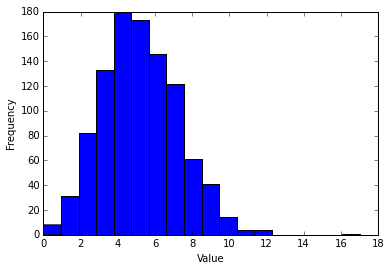

In [182]:
a = np.random.poisson(5, 1000)
bc = np.bincount(a)
print(bc)
pp.hist(a, bins=len(bc))
pp.xlabel('Value')
pp.ylabel('Frequency')
pp.show()

#### 3. Реализуйте функцию, которая принимает на вход numpy-массив целых чисел `a`, и генерирует массив, в котором число `i` встречается `a[i]` раз. Протестируйте на результате из прошлого задания.

Обратите внимание на функцию `np.repeat`

In [112]:
def my_repeat(a):
    return np.repeat(np.arange(len(a)), a)
print(bc)
print(np.bincount(my_repeat(bc)))

[ 11  32  80 149 161 163 155  97  82  32  18  11   6   2   1]
[ 11  32  80 149 161 163 155  97  82  32  18  11   6   2   1]


#### 4. Напишите функцию `scale(X)`, которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на каких-нибудь данных.

In [131]:
def scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1
    return (X - mean[np.newaxis, :]) / std[np.newaxis, :]
X = np.arange(6).reshape(3, 2)
print(X)
print(scale(X))
print('----------')
X[:2, :] = X[2, :]
print(X)
print(scale(X))
print('----------')
X = np.random.rand(3, 2)
print(X)
print(scale(X))

[[0 1]
 [2 3]
 [4 5]]
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
----------
[[4 5]
 [4 5]
 [4 5]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
----------
[[ 0.81201943  0.44423248]
 [ 0.3626506   0.30766995]
 [ 0.72564354  0.66830261]]
[[ 0.91723527 -0.196207  ]
 [-1.39082448 -1.11479679]
 [ 0.47358921  1.31100379]]


#### 5. Сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}(10, 1)$. Найдите ее:
- определитель
- след
- наименьший и наибольший элементы
- спектральную норму
- норму Фробениуса
- собственные числа
- обратную матрицу

In [142]:
X = np.random.normal(10, 1, (5, 5))
print(X)
print('Det', np.linalg.det(X))
print('Trace', np.trace(X))
print('Min element', X.min())
print('Max element', X.max())
print('Spectral norm', np.linalg.cond(X, p=2))
print('Frobenius norm', np.linalg.cond(X, p='fro'))
print('Eigenvalues\n', np.linalg.eigvals(X))
print('Inverse matrix\n', np.linalg.inv(X))

[[ 10.62578231  10.15337435   8.48613329  11.36308294   9.82850034]
 [  7.5342312   11.66815771  11.22812717  10.20883261  10.53527619]
 [  9.69249144   9.46807061  10.3701645   10.16448634  10.49932625]
 [  8.37897857   9.97859778   8.06419878   8.56660342   9.70983511]
 [  9.33130653  10.52677438   9.68354119   9.51848406   9.81801337]]
Det 173.758075179
Trace 51.0487213117
Min element 7.53423120133
Max element 11.6681577149
Spectral norm 84.1052779353
Frobenius norm 100.323344122
Eigenvalues
 [ 49.06652012+0.j           1.59813715+1.52429433j   1.59813715-1.52429433j
  -0.60703655+0.59795276j  -0.60703655-0.59795276j]
Inverse matrix
 [[-0.07288185 -0.38492166 -0.02697138 -0.15509767  0.6682339 ]
 [ 0.00620146  0.05940142 -0.55333149  0.02256709  0.49946191]
 [-0.21582331  0.03017948  0.16631999 -0.47045991  0.47108417]
 [ 0.45536816  0.30185526  0.01236485 -0.19640628 -0.59874278]
 [-0.16598868 -0.02026195  0.44288114  0.77764338 -0.95292776]]


## Часть 3: Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные: http://stat-computing.org/dataexpo/2009/2008.csv.bz2
(обратите внимание, что распаковывать этот файл не обязательно — функция `pandas.read_csv` умеет читать из архивов автоматически)

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

1. Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)
2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
3. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?
4. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?
5. Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
6. Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [336]:
data = pd.read_csv('./2008_1e6.csv')

#### Примечание: задача решалась на части исходного датасета (первый миллион строк из примерно семи миллионов). Весь датасет мой компьютер прочитать не смог

In [421]:
print('Most frequent cancellation code: %s' % data[data.CancellationCode.notnull()].CancellationCode.value_counts().idxmax())

Most frequent cancellation code: B


Наиболее частая причина отмены - B (погодные условия)

In [422]:
print('Min flight distance: %d' % data.Distance.min())
print('Max flight distance: %d' % data.Distance.max())
print('Mean flight distance: %d' % data.Distance.mean())

Min flight distance: 24
Max flight distance: 4962
Mean flight distance: 689


Минимальное пройденное расстояние - 24 мили

Максимальное - 4962 мили

Среднее - 689 миль

In [423]:
shortest = data[data.Distance == data.Distance.min()][[0, 1, 2, 3, 8, 9, 16, 17, 18]]
#print(shortest[[0, 1, 2, 3, 8, 9, 16, 17, 18]])
meandist = []
for i in shortest.iterrows():
    meandist.append(data[(data.FlightNum == i[1].FlightNum) & (data.UniqueCarrier == i[1].UniqueCarrier)].Distance.median())
shortest.insert(9, 'MedianDistance', meandist)
shortest

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest,Distance,MedianDistance
151660,2008,1,2,3,OH,5610,IAD,DCA,24,613


Выглядит действительно подозрительно. Однако тут есть еще более страная деталь

In [424]:
data[(data.FlightNum == 5610) & (data.UniqueCarrier == 'OH')][[0, 1, 2, 3, 8, 9, 16, 17, 18]].iloc[:10]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest,Distance
151659,2008,1,2,3,OH,5610,HSV,DCA,613
151660,2008,1,2,3,OH,5610,IAD,DCA,24
152316,2008,1,3,4,OH,5610,HSV,DCA,613
152976,2008,1,4,5,OH,5610,HSV,DCA,613
153442,2008,1,5,6,OH,5610,HSV,DCA,613
154638,2008,1,7,1,OH,5610,HSV,DCA,613
155207,2008,1,8,2,OH,5610,HSV,DCA,613
155850,2008,1,9,3,OH,5610,HSV,DCA,613
156512,2008,1,10,4,OH,5610,HSV,DCA,613
157175,2008,1,11,5,OH,5610,HSV,DCA,613


Как Вы видите, обычно этот рейс летит из HSV в DCA. Но 2-го января он внезапно вылетел из IAD. 

In [425]:
airports = data.groupby('Origin')
print('Most frequent origin:', airports.size().idxmax())

Most frequent origin: ATL


Аэропорт с наибольшим числом вылетов - Hartsfield–Jackson Atlanta International Airport (ATL) - Атланта, Джорджия, США

In [426]:
print('Biggest mean airtime airport:', airports.AirTime.mean().idxmax())

Biggest mean airtime airport: SJU


Аэропорт с наибольшим средним временем полета -  Luis Muñoz Marín International Airport (SJU) - Сан-Хуан, Пуэрто-Рико

In [420]:
x = pd.DataFrame({'Origin': data['Origin'], 'Delayed': data.DepDelay > 0})
ap = x.groupby('Origin')['Delayed'].agg({'Total' : len, 'Delayed': np.sum})
bigap = ap[ap.Total >= 1000]
mostdelayed = (bigap.Delayed / bigap.Total).idxmax()
print('Airport with biggest delayed part:', mostdelayed)
md = bigap.loc[mostdelayed]
print('%d delayed of %d flights (%.1f%%)' % (md.Delayed, md.Total, md.Delayed / md.Total * 100))

Airport with biggest delayed part: MDW
8684 delayed of 14746 flights (58.9%)


Аэропорт с наибольшим числом задержанных рейсов - Chicago Midway International Airport (MDW) - Чикаго, Иллиноис, США

8684 задержанных рейса из 14746 - 58.9%